# Figure of firing maps statistics between open field, light and dark trials.

Most calculations of the scores was done in `light_dark_stats.ipynb` and saved in `/adata/projects/autopi_ca1/results/light_dark_stats.csv`

This includes mean rate, peak rate, info scores, map correlations for the 3 main conditions

In [1]:
%load_ext autoreload
%autoreload 2
%run setup_project.py

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 40 testing sessions in the list
See myProject and sSesList objects


Load the pandas DataFrame with statistics

In [2]:
fn = "/adata/projects/autopi_ca1/results/myMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myMaps = pickle.load(handle)

In [3]:
fn = "/adata/projects/autopi_ca1/results/myMapStats.csv" # , data frame with hd stats
mapStats = pd.read_csv(fn)

Load spike-time autocorrelations

In [4]:
fn = "/adata/projects/autopi_ca1/results/myAutos.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myAutos = pickle.load(handle)

In [5]:
fn=myProject.dataPath+"/results/mapCorDf.csv"
mapCorDf = pd.read_csv(fn)

Load ifr and mapsim pair analysis

In [6]:
fn=myProject.dataPath+"/results/pairs_ifrAsso_mapSim.csv"
print("Loading ",fn)
pairDf = pd.read_csv(fn)

fn=myProject.dataPath+"/results/pairs_cc.npy"
print("Loading ",fn)
pairCc = np.load(fn)

Loading  /adata/projects/autopi_ca1/results/pairs_ifrAsso_mapSim.csv
Loading  /adata/projects/autopi_ca1/results/pairs_cc.npy


In [7]:
pairDf.columns

Index(['ifrAsso_circ80', 'ifrAsso_circ80_1', 'ifrAsso_circ80_2',
       'ifrAsso_light', 'ifrAsso_dark', 'ifrAsso_light_1', 'ifrAsso_light_2',
       'ifrAsso_dark_1', 'ifrAsso_dark_2', 'ifrAsso_all_light',
       'ifrAsso_all_dark', 'ifrAsso_all_light_1', 'ifrAsso_all_light_2',
       'ifrAsso_all_dark_1', 'ifrAsso_all_dark_2', 'id1', 'id2', 'session',
       'mapSim_circ80', 'mapSim_circ80_1', 'mapSim_circ80_2', 'mapSim_light',
       'mapSim_dark', 'mapSim_light_1', 'mapSim_light_2', 'mapSim_dark_1',
       'mapSim_dark_2', 'mapSim_all_light', 'mapSim_all_dark',
       'mapSim_all_light_1', 'mapSim_all_light_2', 'mapSim_all_dark_1',
       'mapSim_all_dark_2'],
      dtype='object')

Check data integrity

In [8]:
for k in myMaps:
    print(myMaps[k].shape)
for k in myAutos:
    print(myAutos[k]["auto"].shape)


(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 33, 49)
(1297, 100)
(1297, 400)


## Filter the data to keep only pyramidal cells

We want to show the maps of pyramidal cells.

In [9]:
fn=myProject.dataPath+"/results/cell_classification.csv"
ct = pd.read_csv(fn)
ct

,id,session,subject,valid,cellType,meanRate,shank,layer
0,mn5824-20112020-0107_80,mn5824-20112020-0107,mn5824,False,NaN,9.201345,4,pyr
1,mn5824-20112020-0107_90,mn5824-20112020-0107,mn5824,False,NaN,8.236764,3,pyr
2,mn5824-20112020-0107_92,mn5824-20112020-0107,mn5824,True,pyr,7.885922,4,pyr
3,mn5824-20112020-0107_96,mn5824-20112020-0107,mn5824,False,NaN,4.153462,1,dn
4,mn5824-20112020-0107_98,mn5824-20112020-0107,mn5824,False,NaN,3.411940,4,pyr
...,...,...,...,...,...,...,...,...
1292,mn9686-01112021-0106_238,mn9686-01112021-0106,mn9686,False,NaN,4.669745,7,dn
1293,mn9686-01112021-0106_240,mn9686-01112021-0106,mn9686,False,NaN,9.647625,2,pyr
1294,mn9686-01112021-0106_241,mn9686-01112021-0106,mn9686,False,NaN,16.161014,2,pyr
1295,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686,True,pyr,5.270951,1,pyr


In [10]:
if ct.shape[0]!=myMaps["circ80"].shape[0]:
    print("problem with length of cell_classification.csv")

In [11]:
pyrIndices=ct.cellType=="pyr"
pyrId=ct.id[ct.cellType=="pyr"]
print("Pyramidal cells: {}".format(np.sum(ct.cellType=="pyr")))


Pyramidal cells: 441


In [12]:
for key in myMaps:
    myMaps[key]=myMaps[key][pyrIndices]
for key in myAutos:
    myAutos[key]["auto"]=myAutos[key]["auto"][pyrIndices]

In [13]:
mapStats = mapStats[mapStats.cellId.isin(pyrId)]
mapStats.shape

(7497, 8)

In [14]:
nCond = len(mapCorDf.condition.unique())

In [15]:
mapCorDf["cellId"] = np.concatenate([ct.id.to_numpy()]*nCond) # 4 because of 4 conditions
mapCorDf = mapCorDf[mapCorDf.cellId.isin(pyrId)]
mapCorDf

,condition,r,cellId
2,oo,0.798742,mn5824-20112020-0107_92
5,oo,0.374445,mn5824-20112020-0107_100
7,oo,0.398904,mn5824-20112020-0107_114
8,oo,0.524512,mn5824-20112020-0107_116
9,oo,0.626884,mn5824-20112020-0107_118
...,...,...,...
7757,dd,0.460326,mn9686-01112021-0106_79
7758,dd,0.344867,mn9686-01112021-0106_81
7769,dd,0.326321,mn9686-01112021-0106_197
7780,dd,0.557380,mn9686-01112021-0106_242


In [16]:
pairPyrIndices = np.logical_and(np.isin(pairDf.id1,pyrId),np.isin(pairDf.id2,pyrId)) # id1 and id2 in the pair are pyr
pairDf = pairDf[pairPyrIndices]
pairCc = pairCc[pairPyrIndices]

In [17]:
for k in myMaps:
    print(myMaps[k].shape)

(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)
(441, 33, 49)


In [18]:
pyrId = pyrId.reset_index(drop=True)
pyrId

0       mn5824-20112020-0107_92
1      mn5824-20112020-0107_100
2      mn5824-20112020-0107_114
3      mn5824-20112020-0107_116
4      mn5824-20112020-0107_118
                 ...           
436     mn9686-01112021-0106_79
437     mn9686-01112021-0106_81
438    mn9686-01112021-0106_197
439    mn9686-01112021-0106_242
440    mn9686-01112021-0106_246
Name: id, Length: 441, dtype: object

## Outliers in pairs of pyramidal cells

We make sure we don't have cells with extremely high correlation of IFR

[('TYY5622-19092021-0106_44', 'TYY5622-19092021-0106_98'),
 ('mn9686-29102021-0106_16', 'mn9686-29102021-0106_255'),
 ('mn9686-01112021-0106_0', 'mn9686-01112021-0106_79'),
 ('mn9686-01112021-0106_74', 'mn9686-01112021-0106_81')]

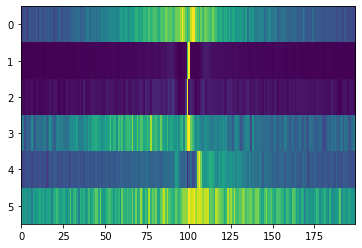

In [19]:
suspiciousCC = pairCc[pairDf.ifrAsso_light>0.50]
a = suspiciousCC/np.expand_dims(suspiciousCC.max(axis=1),1)

plt.imshow(a,aspect="auto",interpolation="None")
plt.savefig("/home/kevin/Downloads/suspiciousCC.pdf")
list(zip(pairDf[pairDf.ifrAsso_circ80>0.50].id1,pairDf[pairDf.ifrAsso_circ80>0.50].id2))

##  Firing rate map examples

I am using `GridSpec` to make a figure with many plots. The margins and number of rows vary in different parts of the figure. I use different GridSpec objects to represent each part (autocorrs, maps, boxplots). This allows me to set different margins for the different sections.

When creating the `GridSpec`, I use the left, right, top, bottom, to specify the part of the figure the GridSpec will use.

In [22]:
myMaps.keys()

dict_keys(['circ80', 'circ80_1', 'circ80_2', 'light', 'light_arena', 'dark', 'dark_arena', 'light_1', 'light_2', 'dark_1', 'dark_2', 'all_light', 'all_light_1', 'all_light_2', 'all_dark', 'all_dark_1', 'all_dark_2'])

saving /adata/projects/autopi_ca1/results/figureMaps.png


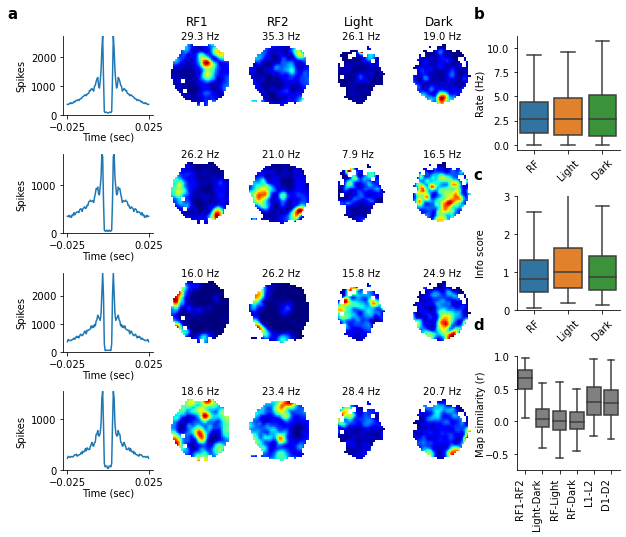

In [28]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
#plt.style.use("seaborn")

# to display names that are ok for the reader
condNames={"circ80_1":"RF1",
          "circ80_2": "RF2",
          "all_light": "Light",
          "all_dark": "Dark"}

col=6
row=4
sizePerCol=2
sizePerRow=2.0

fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=False) # create the overall figure to put all the axes on

selected_cells=[420,421,422,423]


#spike-time autocorrelations
gsAuto = fig.add_gridspec(nrows=row, ncols=col,
                        wspace=0.3,hspace=0.5)

for i,cellIndex in enumerate(selected_cells):
    ax = fig.add_subplot(gsAuto[i,0])
    ax.plot(myAutos[25]["time"],myAutos[25]["auto"][cellIndex])
    ax.set_ylim(0,np.max(myAutos[25]["auto"][cellIndex]))
    ax.set_ylabel("Spikes")
    ax.set_xlabel("Time (sec)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks([-0.025,0.025])
    ax.xaxis.set_label_coords(0.5, -0.22)
    
   
gsMap = fig.add_gridspec(nrows=row, ncols=col,
                        hspace=0.5,wspace=0.0,left=0.14,right=0.70)

for i,cellIndex in enumerate(selected_cells):
    for j,cond in enumerate(["circ80_1","circ80_2", "all_light", "all_dark"]):
        ax = fig.add_subplot(gsMap[i,j+1])
        ax.imshow(myMaps[cond][cellIndex][:-2,10:].T,origin="lower",cmap='jet')
        myText="{:.1f} Hz".format(np.nanmax(myMaps[cond][cellIndex]))
        ax.text(7,myMaps[cond][cellIndex].shape[1]-12,myText)
        if i == 0 :
            ax.set_title(condNames[cond],y=1.06)
        ax.axis('off')

        
        
##################
# statistics
##################
gsStats = fig.add_gridspec(nrows=3, ncols=col,
                           hspace=0.4,wspace=0.1)
ax = fig.add_subplot(gsStats[0,4])
##################
# mean rate
#
df = mapStats[mapStats.condition.isin(["circ80","all_light","all_dark"])]

ax = sns.boxplot(x="condition", y="meanRate", data=df,showfliers = False)
ax.set_xlabel("")
ax.set_ylabel("Rate (Hz)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(["RF","Light","Dark"], rotation=45)
ax.yaxis.set_label_coords(-0.3, 0.5)

######################
# Info score
#

ax = fig.add_subplot(gsStats[1,4])
# select what we want to plot

df = mapStats[mapStats.condition.isin(["circ80","all_light","all_dark"])]
df = df[df.meanRate>0.2]

ax = sns.boxplot(x="condition", y="info", data=df,showfliers = False)
ax.set_ylim(0,3)
ax.set_xlabel("")
ax.set_ylabel("Info score")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(["RF","Light","Dark"], rotation=45)
ax.yaxis.set_label_coords(-0.3, 0.5)


#####################
# Map similarity
#
ax = fig.add_subplot(gsStats[2,4])


ax = sns.boxplot(x="condition", y="r", data=mapCorDf,showfliers = False)
ax.set_ylim(-0.75,1)
ax.set_xlabel("")
ax.set_ylabel("Map similarity (r)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(["RF1-RF2","Light-Dark","RF-Light","RF-Dark","L1-L2", "D1-D2"], rotation=90,horizontalalignment='right')
ax.yaxis.set_label_coords(-0.3, 0.5)
for i in range(0,6):
    mybox = ax.artists[i]
    mybox.set_facecolor("gray")


   
    
    
    
    
plt.text(0.06,0.91, 'a', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.6,0.91, 'b', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.6,0.63, 'c', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.6,0.37, 'd', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)

fn = myProject.dataPath+"/results/figureMaps.png"
print("saving",fn)
plt.savefig(fn)

In [29]:
from scipy.stats import wilcoxon
for cond in ["oo","ld","ol","od","ll","dd"]:
    d = mapCorDf[mapCorDf.condition ==cond].r
    print("{}: {}, {:.3f}, {}".format(cond,np.nanmedian(d),len(d),wilcoxon(d)))

oo: 0.6677436782120603, 441.000, WilcoxonResult(statistic=23.0, pvalue=6.3961151032251144e-74)
ld: 0.042835952820073, 441.000, WilcoxonResult(statistic=33267.0, pvalue=7.725355370867538e-09)
ol: 0.0041282359431547, 441.000, WilcoxonResult(statistic=44688.0, pvalue=0.13116062583155433)
od: -0.0023298449187688, 441.000, WilcoxonResult(statistic=44944.0, pvalue=0.15737778006012004)
ll: 0.3030846119741464, 441.000, WilcoxonResult(statistic=3997.0, pvalue=1.219949261550053e-62)
dd: 0.28141358016200313, 441.000, WilcoxonResult(statistic=3056.0, pvalue=3.172452531435948e-65)


Figure x. (**a**) Example of hippocampal neurons recorded during random foraging in an open field and during the path integration task. Left: spike-time autocorrelation. Right: Firing rate maps during open field foraging (OF) and during light (Light) and dark (Dark) trials of the AutoPI task. (**b** and **c**) Mean firing rates and spatial information scores of neurons during open field foraging and light and dark trails of the AutoPI task. (**d**) Firing rate map similarity between different conditions. OF1-OF2: first and second half of open field foraging; Light-Dark: light and dark trials; OF-Light: open field foraging and light trials; OF-Dark: open field foraging and dark trials; L1-L2: two exclusive sets of light trials; D1-D2: two exclusive sets of dark trials.

In [33]:
print("Number of pairs: {}".format(len(pairDf["ifrAsso_circ80_1"])))

Number of pairs: 5171


saving /adata/projects/autopi_ca1/results/firingAssociations.png


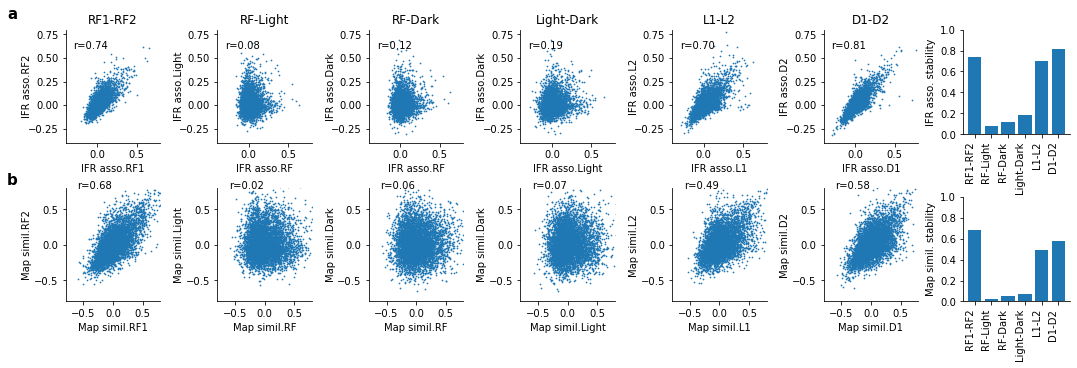

In [27]:
from scipy.stats import pearsonr
cond_pairs = [("circ80_1","circ80_2"),("circ80","all_light"),("circ80","all_dark"),("all_light","all_dark"),("all_light_1","all_light_2"),("all_dark_1","all_dark_2")]
prefix = ["ifrAsso","mapSim"]
prefix_names = {"ifrAsso": "IFR asso.", "mapSim": "Map simil."}
cond_names = {"circ80": "RF", "circ80_1":"RF1","circ80_2":"RF2","all_light":"Light","all_dark":"Dark","all_light_1":"L1","all_light_2":"L2", "all_dark_1":"D1","all_dark_2":"D2"}
fig = plt.figure(figsize=(18,5))


### scatter plots
gsScatter = fig.add_gridspec(nrows=2, ncols=7,
                           hspace=0.4,wspace=0.6)

r_values = np.empty((len(prefix),len(cond_pairs)))
for i,(cond1,cond2) in enumerate(cond_pairs):
    for j, p in enumerate(prefix):
        a = pairDf[p+"_"+cond1]
        b = pairDf[p+"_"+cond2]
        indices = np.logical_and(~np.isnan(a), ~np.isnan(b))
        r,pv =pearsonr(a[indices],b[indices])
        r_values[j,i]=r
        ax = fig.add_subplot(gsScatter[j,i])
        ax.scatter(a,b,s=0.5)
        if j ==0:
            ax.set_title(cond_names[cond1]+"-"+ cond_names[cond2] )
        ax.set_xlabel(prefix_names[p]+cond_names[cond1])
        ax.set_ylabel(prefix_names[p]+cond_names[cond2])
        if j == 0:
            ax.set_xlim(-0.4,0.8)
            ax.set_ylim(-0.4,0.8)
            ax.text(-0.3,0.6,"r={:.2f}".format(r))
        if j == 1:
            ax.set_xlim(-0.80,0.80)
            ax.set_ylim(-0.80,0.80)
            ax.text(-0.6,0.8,"r={:.2f}".format(r))
        ax.yaxis.set_label_coords(-0.35, 0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        
### summary plots
gsScatter = fig.add_gridspec(nrows=2, ncols=7,
                           hspace=0.6,wspace=0.4)     


prefix_names = {"ifrAsso": "IFR asso. stability", "mapSim": "Map simil. stability"}
for j, p in enumerate(prefix):
    ax = fig.add_subplot(gsScatter[j,6])
    xpos = np.arange(len(r_values[j,:]))
    ax.bar(xpos,r_values[j,:])
    ax.set_ylim(0.0,1)
    ax.set_xticks(xpos)
    ax.set_xticklabels(["RF1-RF2","RF-Light","RF-Dark","Light-Dark","L1-L2","D1-D2"], rotation=90,horizontalalignment='right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel(prefix_names[p])

plt.text(0.08,0.91, 'a', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
plt.text(0.08,0.45, 'b', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)


fn = myProject.dataPath+"/results/firingAssociations.png"
print("saving",fn)
plt.savefig(fn)


Figure x: (**a**) (**b**)